**Hierarchical softmax tends to be better for infrequent words, while negative sampleing works better for frequent words and low dimensional vectors.**

Hierarchical softmax uses a binary tree to represent all words in the vocabulary. Each leaf of the tree is a word, and there is a unique path from root to leaf. **In this model, there is no output representation for words. Instead, each node of the graph (except the root and the leaves) is associated to a vector that the model is going to learn. **

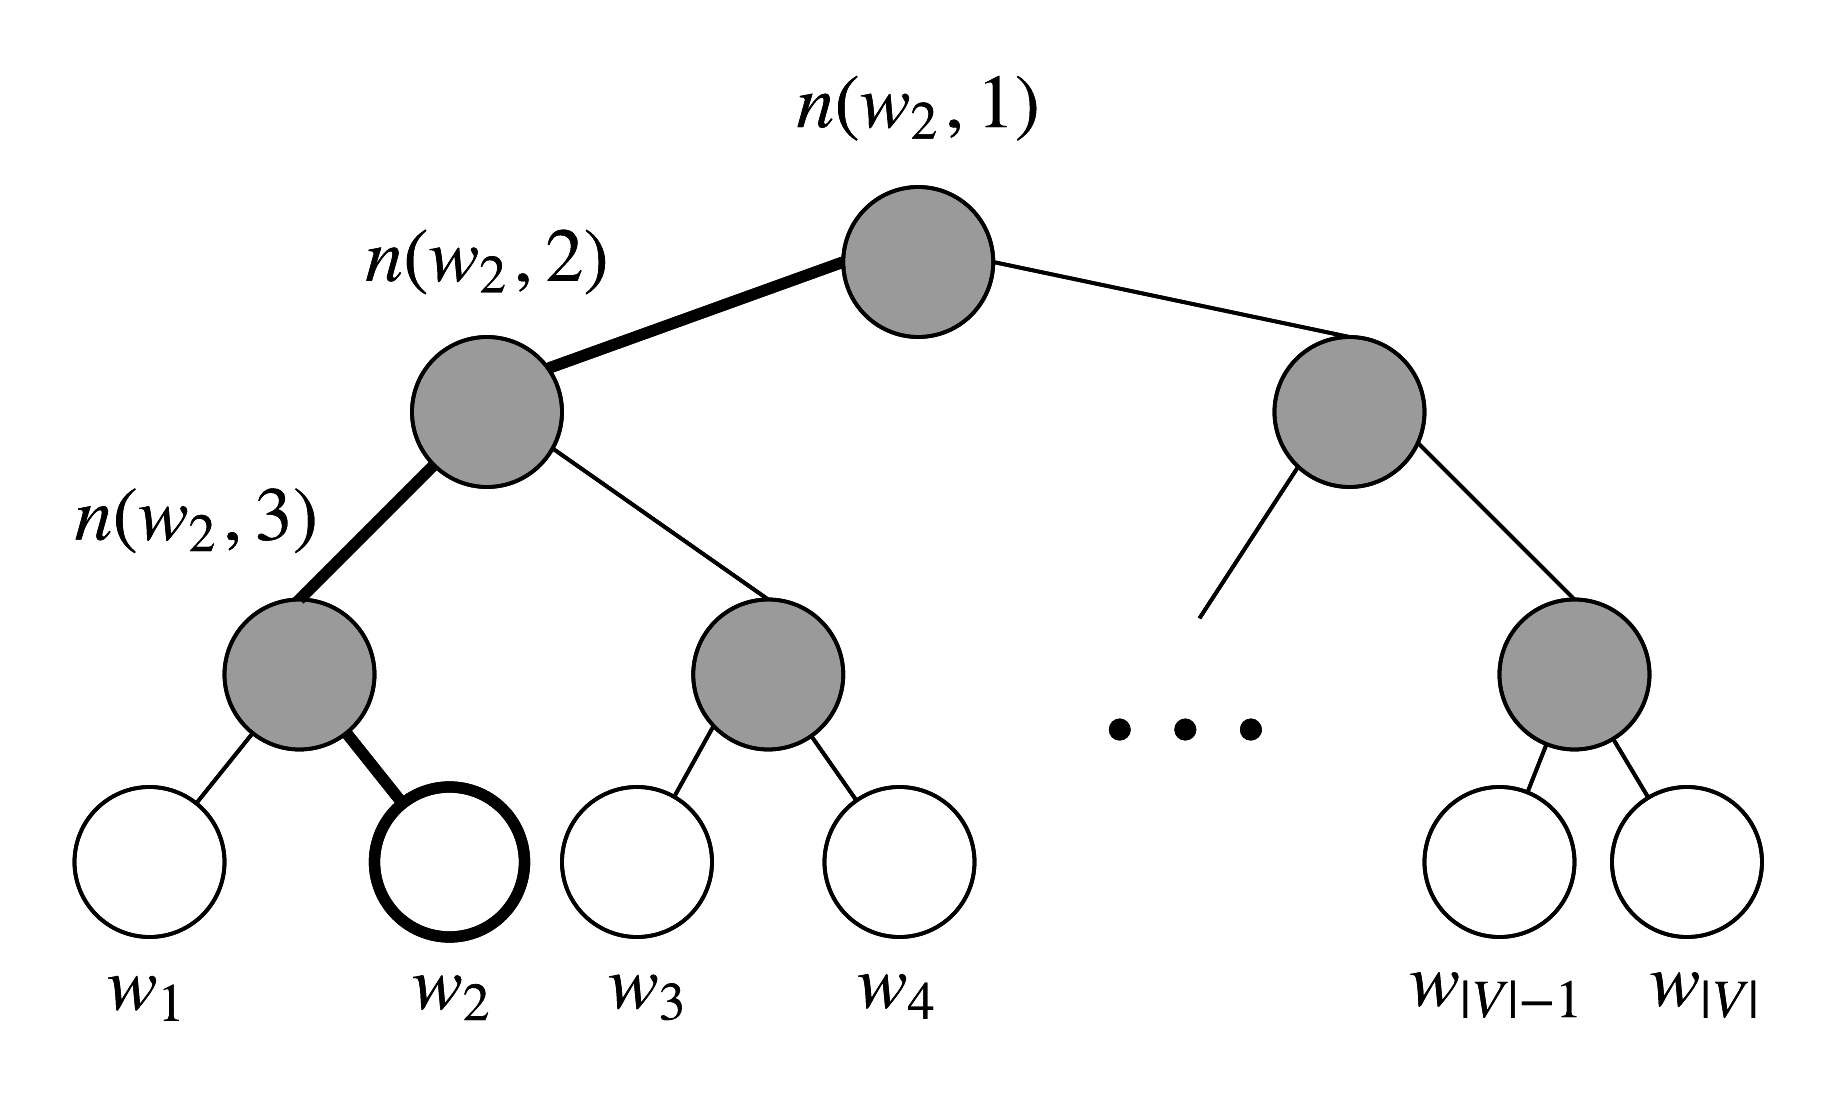

In this model, **the probability of a word $w$ given a vector $w_i$, $P(w|w_i)$ is equal to the probability of a random walk starting in the root and ending in the leaf node corresponding to $w$, the main advantage in computing the probability this way is that the cost is only $O(\log|V|)$**, corresponding to the length of the path.

Let $L(w)$ be the number of nodes in the path from the root to the leaft $w$. $n(w, i)$ as the $i-th$ node on this path with associated vector $v_n(w, i)$. So $n(w, 1)$ is the root, while $n(w, L(w))$ is the father of $w$.

For each inner node $n$, arbitrarily choose one of its children and call it $ch(n)$ (e.g. always the left node).

Then we can compute the probability as,

$$
P(w|w_i) = \Pi_{j=1}^{L(w)-1}\sigma([n(w, j+1) = ch(n(w, j))]\cdot v_{n(w,j)}^Tv_{w_i})
$$

where 
$$
[x] =
\begin {cases}
1,    \text{if x is true}\\
-1,   \text{otherwise}
\end {cases}
$$
and $sigma(\cdot)$ is the sigmoid function.

For the equation above.

**First, we are computing a product of terms based on the shape of the path from the root $(n(w, 1))$ to the left $(w)$.**

**If we assume $ch(n)$ is always the left node of n, then term $[n(w, j+1) = ch(n(w, j))]$ returns 1 when the path goes left, and -1 if right.**

**Furthermore, the term $[n(w, j+1) = ch(n(w, j))]$ provides normalization.** 

At a node n, if we sum the probabilities for goint to the left and right node, you can check that for any value of $v_n^Tv_{w_i}$

$$
\sigma(v_n^Tv_{w_i}) + \sigma(-v_n^Tv_{w_i}) = 1
$$

The normalization also ensures that $\Sigma_{w=1}^{|V|}P(w|w_i)=1$, just as in original softmax

**Finally, we compare the similarity of our input vector $v_{w_i}$ to each inner node vector $v_{n(w,j)}^T$ using a dot product**

For example. Taking $w_2$ in the Figure above, we take two left edges and then a right edge to reach $w_2$ from the root, So

$$
\begin{eqnarray}
P(w_2|w_i) & = & p(n(w2,1),left)\cdot p(n(w_2, 2), left) \cdot p(n(w_2, 3), right) \\
& = & \sigma(v_{n(w_2, 1)}^Tv_{w_i})\cdot \sigma(v_{n(w_2, 2)}^Tv_{w_i}) \cdot \sigma(-v_{n(w_2, 3)}^Tv_{w_i})
\end{eqnarray}
$$

To train the model, the goal is still to minimize the negative log likelihood $-\log P(w|w_i)$.

But instead of updating output vectors per word, **we update the vectors of the nodes in the binary tree that are in the path from root to leaf node.**

The speed of this mothod is determined by the way in which the binary tree is constructed and words are assigned to left nodes.